In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex2/ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


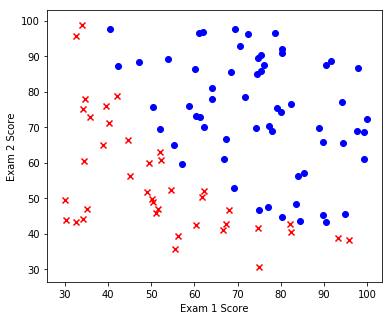

In [3]:
pos = data[data.admitted.isin(['1'])]
neg = data[data.admitted.isin(['0'])]

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(pos['exam1'], pos['exam2'], c='b', label='Admitted')
ax.scatter(neg['exam1'], neg['exam2'], c='r', label='Not Admitted', marker='x')

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def cost(X, y, theta):
    h = sigmoid(np.dot(X, theta.T))
    _sum = np.sum((-y * np.log(h)) - ((1 - y) * np.log(1 - h)))
    return _sum / len(X)

In [6]:
def gradient(X, y, theta):
    return (np.dot(X.T, sigmoid(np.dot(X, theta.T)) - y) / len(X)).T

In [27]:
def GD(X, y, theta, alpha, epoch):
    temp = np.array([[0]*theta.shape[1]])
    _cost = []
    m = X.shape[0]
    
    for i in range(epoch):
        temp = theta - (alpha / m) * gradient(X, y, theta)
        theta = temp
        _cost.append(cost(X, y, theta))
        
        if i % 5000 == 0:
            print('epoch:', i, 'cost:', theta[0])
    
    return theta, _cost

In [8]:
data.insert(0, 'ones', 1)
data.head()

,ones,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:, -1:])
theta = np.array([[0]*X.shape[1]])
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [10]:
cost(X, y, theta)

0.6931471805599453

In [11]:
gradient(X, y, theta)

array([[ -0.1       , -12.00921659, -11.26284221]])

In [28]:
alpha = 0.1
epoch = 200000
f_theta, his_cost = GD(X, y, theta, alpha, epoch)

epoch: 0 cost: [0.0001     0.01200922 0.01126284]
epoch: 5000 cost: [-0.34172467  0.01280219  0.00311026]
epoch: 10000 cost: [-0.66903009  0.01509195  0.00566287]
epoch: 15000 cost: [-0.98258299  0.01729802  0.00811298]
epoch: 20000 cost: [-1.28307085  0.01942402  0.01046468]
epoch: 25000 cost: [-1.57118725  0.02147362  0.01272234]
epoch: 30000 cost: [-1.84761893  0.02345052  0.01489053]
epoch: 35000 cost: [-2.11303582  0.02535835  0.01697385]
epoch: 40000 cost: [-2.36808384  0.02720063  0.01897689]
epoch: 45000 cost: [-2.61337989  0.02898077  0.02090411]
epoch: 50000 cost: [-2.84950889  0.03070203  0.02275987]
epoch: 55000 cost: [-3.07702217  0.03236751  0.02454829]
epoch: 60000 cost: [-3.29643712  0.03398016  0.02627331]
epoch: 65000 cost: [-3.50823755  0.03554276  0.02793866]
epoch: 70000 cost: [-3.71287475  0.03705793  0.02954783]
epoch: 75000 cost: [-3.91076887  0.03852814  0.03110409]
epoch: 80000 cost: [-4.10231056  0.03995569  0.0326105 ]
epoch: 85000 cost: [-4.28786273  0.0413

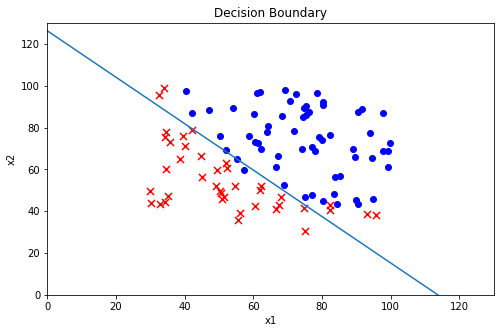

In [29]:
x1 = np.arange(130, step=0.1)
x2 = -(f_theta[0][0] + x1*f_theta[0][1]) / f_theta[0][2]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(pos['exam1'], pos['exam2'], c='b', label='Admitted')
ax.scatter(neg['exam1'], neg['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x1, x2)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary')
plt.show()